# Exploración de los datos del fútbol europeo

![](http://a.espncdn.com/photo/2012/1117/soc_europe_09.jpg)

# Cargar Datos

In [10]:
import pandas as pd
from sqlalchemy import create_engine

In [35]:
DATABASE_ENGINE = create_engine('sqlite:///database.sqlite')

## Cargar jugadores

In [60]:
players = pd.read_sql(sql="SELECT * FROM player", con=DATABASE_CONNECTION, index_col='id')

In [61]:
players.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
id,,,,,,
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


## Cargar sus estadísticos

In [84]:
player_stats = pd.read_sql(sql="SELECT * FROM player_stats", con=DATABASE_CONNECTION, index_col='id')

In [85]:
player_stats.head(3)

,player_fifa_api_id,player_api_id,date_stat,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


# Juntar los datasets

In [93]:
player_data = player_stats.merge(players, on='player_api_id')

In [100]:
player_data.head(8)

,player_api_id,date_stat,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
5,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,53.0,58.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
6,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,53.0,58.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
7,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,52.0,57.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15 00:00:00,170.18,146


# Quitarle datos antiguos

In [158]:
latest_date_stat_per_player = ( player_data.groupby('player_api_id')['date_stat'].transform(max) == player_data['date_stat'] )

In [159]:
player_data_latest = player_data[latest_date_stat_per_player]

In [160]:
player_data_latest.head(5)

,player_api_id,date_stat,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
5,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,53.0,58.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
38,162549,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,64.0,58.0,60.0,...,24.0,16.0,11.0,12.0,9.0,13.0,Aaron Doran,1991-05-13 00:00:00,170.18,163
64,30572,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,57.0,21.0,68.0,...,68.0,15.0,12.0,13.0,12.0,11.0,Aaron Galindo,1982-05-08 00:00:00,182.88,198
87,23780,2015-12-24 00:00:00,70.0,70.0,right,medium,medium,46.0,34.0,73.0,...,71.0,8.0,6.0,16.0,12.0,11.0,Aaron Hughes,1979-11-08 00:00:00,182.88,154


# ¿Quiénes tiene el "overall_rating" más grande?

In [211]:
top_10_players = player_data_latest.sort_values(by='overall_rating', ascending=False).head(10)

In [212]:
top_10_players[['player_name', 'birthday', 'height', 'weight']]

,player_name,birthday,height,weight
102004,Lionel Messi,1987-06-24 00:00:00,170.18,159
33156,Cristiano Ronaldo,1985-02-05 00:00:00,185.42,176
130860,Neymar,1992-02-05 00:00:00,175.26,150
108535,Manuel Neuer,1986-03-27 00:00:00,193.04,203
105494,Luis Suarez,1987-01-24 00:00:00,182.88,187
16383,Arjen Robben,1984-01-23 00:00:00,180.34,176
182827,Zlatan Ibrahimovic,1981-10-03 00:00:00,195.58,209
121882,Mesut Oezil,1988-10-15 00:00:00,182.88,168
169002,Thiago Silva,1984-09-22 00:00:00,182.88,174
47010,Eden Hazard,1991-01-07 00:00:00,172.72,163


# ¿Cuantos años tienen?

In [213]:
top_10_players['approximate_age'] = pd.to_datetime('today') - pd.to_datetime(top_10_players['birthday'])
top_10_players[['player_name', 'approximate_age']].head(6)

,player_name,approximate_age
102004,Lionel Messi,10661 days
33156,Cristiano Ronaldo,11530 days
130860,Neymar,8974 days
108535,Manuel Neuer,11115 days
105494,Luis Suarez,10812 days
16383,Arjen Robben,11909 days


In [214]:
top_10_players['approximate_age'] = top_10_players['approximate_age'].dt.days / 365
top_10_players[['player_name', 'approximate_age']].head(10)

,player_name,approximate_age
102004,Lionel Messi,29.208219
33156,Cristiano Ronaldo,31.589041
130860,Neymar,24.586301
108535,Manuel Neuer,30.452055
105494,Luis Suarez,29.621918
16383,Arjen Robben,32.627397
182827,Zlatan Ibrahimovic,34.934247
121882,Mesut Oezil,27.895890
169002,Thiago Silva,31.961644
47010,Eden Hazard,25.665753


# ¿Cómo varia "ball_control" con "shot_power"?

In [215]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

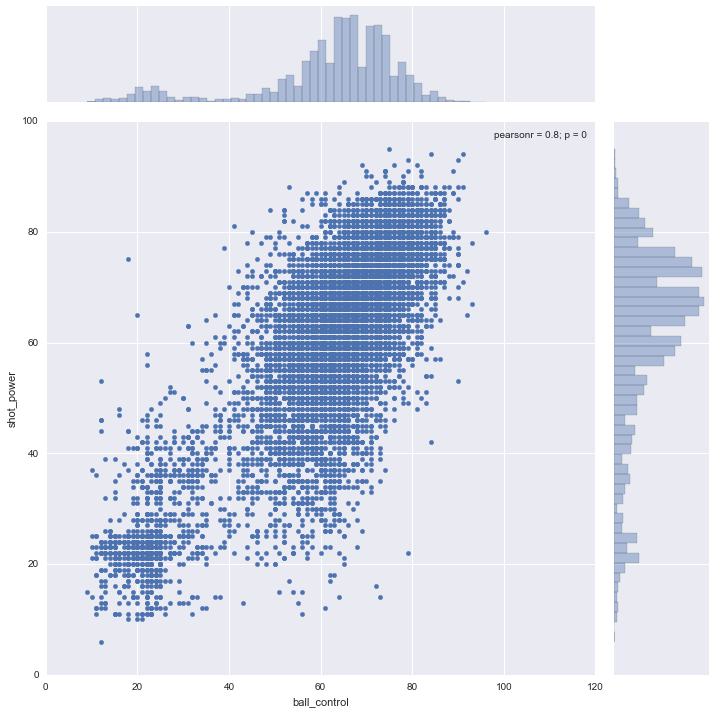

In [216]:
sns.jointplot(x='ball_control', y='shot_power', data=player_data_latest, size=10)